In [3]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('/content/emails.csv')
print(data.head())


  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]


In [12]:
# Inspect the data
print(data.info())
print(data.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB
None
               the           to          ect          and          for  \
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000   
mean      6.640565     6.188128     5.143852     3.075599     3.124710   
std      11.745009     9.534576    14.101142     6.045970     4.680522   
min       0.000000     0.000000     1.000000     0.000000     0.000000   
25%       0.000000     1.000000     1.000000     0.000000     1.000000   
50%       3.000000     3.000000     1.000000     1.000000     2.000000   
75%       8.000000     7.000000     4.000000     3.000000     4.000000   
max     210.000000   132.000000   344.000000    89.000000    47.000000   

                of            a          you          hou           in  ...  \
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000  .

In [13]:
# Inspect the DataFrame columns
print(data.columns)


Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)


In [14]:
# Target column
target_column = 'Prediction'

# Ensure the target column exists
if target_column not in data.columns:
    raise ValueError(f"Target column '{target_column}' not found in dataset.")

# Separate features and target
X = data.drop(columns=['Email No.', target_column])
y = data[target_column]


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam




In [16]:
import pandas as pd
import numpy as np

# Check for NaN values
print("Number of NaN values in each column:")
print(X.isna().sum())

# Fill NaN values with the mean of the column
X = X.fillna(X.mean())

# Verify that there are no more NaN values
print("Number of NaN values in each column after filling:")
print(X.isna().sum())


Number of NaN values in each column:
the               0
to                0
ect               0
and               0
for               0
                 ..
infrastructure    0
military          0
allowing          0
ff                0
dry               0
Length: 3000, dtype: int64
Number of NaN values in each column after filling:
the               0
to                0
ect               0
and               0
for               0
                 ..
infrastructure    0
military          0
allowing          0
ff                0
dry               0
Length: 3000, dtype: int64


In [17]:
# Check for null values in the target column
null_values_y = y.isna().sum()
print(f"Number of null values in the target column: {null_values_y}")


Number of null values in the target column: 0


In [18]:
# Drop rows with null values in the target column
data_clean = data.dropna(subset=['Prediction'])

# Separate features and target after dropping null values
X_clean = data_clean.drop(columns=['Email No.', 'Prediction'])
y_clean = data_clean['Prediction']

# Verify null values have been handled
print(f"Number of null values in the target column after handling: {y_clean.isna().sum()}")


Number of null values in the target column after handling: 0


In [19]:
import pandas as pd

# Assuming 'data' is your DataFrame

# Step 1: Check for NaN values in the target column 'Prediction'
print(f"Initial number of null values in the target column: {data['Prediction'].isna().sum()}")

# Step 2: Drop rows with NaN values in the target column
data_clean = data.dropna(subset=['Prediction'])

# Step 3: Separate features and target after dropping null values
X_clean = data_clean.drop(columns=['Email No.', 'Prediction'])
y_clean = data_clean['Prediction']

# Step 4: Verify null values have been handled
print(f"Number of null values in the target column after handling: {y_clean.isna().sum()}")
print(f"Shape of the dataset after dropping null values: {data_clean.shape}")

# Reconfirm there are no NaN values in X and y
assert X_clean.isna().sum().sum() == 0, "There are still NaN values in the features."
assert y_clean.isna().sum() == 0, "There are still NaN values in the target."


Initial number of null values in the target column: 0
Number of null values in the target column after handling: 0
Shape of the dataset after dropping null values: (5172, 3002)


In [20]:
from sklearn.feature_selection import SelectKBest, chi2

# Perform Chi-Square test for feature selection
chi2_selector = SelectKBest(chi2, k=50)  # Select top 50 features
X_kbest = chi2_selector.fit_transform(X_clean, y_clean)

# Get selected feature names
selected_features_chi2 = X_clean.columns[chi2_selector.get_support()]

# Print selected features
print("Selected features using Chi-Square Test:")
print(selected_features_chi2)


Selected features using Chi-Square Test:
Index(['ect', 'of', 'a', 'hou', 'in', 'enron', 'i', 's', 'it', 'hpl', 're',
       'e', 'our', 'd', 'an', 't', 'l', 'm', 'us', 'http', 'b', 'p', 'o', 'c',
       'font', 'r', 'w', 'x', 'f', 'u', 'n', 've', 'g', 'v', 'nd', 'st', 'y',
       'ic', 'ali', 'sec', 'td', 'z', 'q', 'mo', 'ce', 'ti', 'pa', 'ii', 'ct',
       'ur'],
      dtype='object')


In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y_clean, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the DNN model
model = Sequential()
model.add(Dense(512, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy}')

# Predict and evaluate further if needed
y_pred = model.predict(X_test_scaled)
y_pred_class = (y_pred > 0.5).astype("int32")

print(classification_report(y_test, y_pred_class))


Epoch 1/20
104/104 [==============================] - 3s 10ms/step - loss: 0.4813 - accuracy: 0.7815 - val_loss: 0.3578 - val_accuracy: 0.8418
Epoch 2/20
104/104 [==============================] - 1s 7ms/step - loss: 0.3279 - accuracy: 0.8543 - val_loss: 0.3254 - val_accuracy: 0.8539
Epoch 3/20
104/104 [==============================] - 1s 7ms/step - loss: 0.2977 - accuracy: 0.8691 - val_loss: 0.3160 - val_accuracy: 0.8551
Epoch 4/20
104/104 [==============================] - 1s 9ms/step - loss: 0.2857 - accuracy: 0.8719 - val_loss: 0.2912 - val_accuracy: 0.8684
Epoch 5/20
104/104 [==============================] - 1s 8ms/step - loss: 0.2659 - accuracy: 0.8876 - val_loss: 0.2900 - val_accuracy: 0.8780
Epoch 6/20
104/104 [==============================] - 1s 13ms/step - loss: 0.2529 - accuracy: 0.8897 - val_loss: 0.2827 - val_accuracy: 0.8768
Epoch 7/20
104/104 [==============================] - 1s 13ms/step - loss: 0.2516 - accuracy: 0.8939 - val_loss: 0.3323 - val_accuracy: 0.8623
Epo

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Train a Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Get feature importances
importances = dt.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': X_clean.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print top 50 features
top_features = feature_importances.head(48)
print("Top 50 features selected using Decision Tree Classifier:")
print(top_features)



Top 50 features selected using Decision Tree Classifier:
          Feature  Importance
13          enron    0.166740
916           ali    0.140812
92           http    0.081003
418         hanks    0.064025
104           nom    0.044515
68          daren    0.043473
36          meter    0.032311
95           mail    0.028088
81       attached    0.022590
0             the    0.020755
20           your    0.018800
5              of    0.012024
599         valid    0.011341
1139         neon    0.010949
23              s    0.007903
519          plan    0.007394
1026       walker    0.006930
14              i    0.006663
9              in    0.006353
1615           dr    0.005952
86            day    0.005738
200          week    0.005270
1235     national    0.004983
34           deal    0.004855
1605       mobile    0.004768
247        online    0.004519
2302           rr    0.004489
74            let    0.004448
407         trade    0.004423
31             or    0.004398
37           

In [23]:
# Select top 50 features
selected_features_dt = top_features['Feature'].values
X_selected = X_clean[selected_features_dt]
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Split the data with selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_clean, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the DNN model
model = Sequential()
model.add(Dense(512, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy}')

# Predict and evaluate further if needed
y_pred = model.predict(X_test_scaled)
y_pred_class = (y_pred > 0.5).astype("int32")

print(classification_report(y_test, y_pred_class))



Epoch 1/20
104/104 [==============================] - 2s 8ms/step - loss: 0.3682 - accuracy: 0.8262 - val_loss: 0.2120 - val_accuracy: 0.9118
Epoch 2/20
104/104 [==============================] - 1s 7ms/step - loss: 0.2021 - accuracy: 0.9148 - val_loss: 0.1622 - val_accuracy: 0.9372
Epoch 3/20
104/104 [==============================] - 1s 7ms/step - loss: 0.1833 - accuracy: 0.9184 - val_loss: 0.1602 - val_accuracy: 0.9336
Epoch 4/20
104/104 [==============================] - 1s 6ms/step - loss: 0.1704 - accuracy: 0.9251 - val_loss: 0.1637 - val_accuracy: 0.9287
Epoch 5/20
104/104 [==============================] - 1s 11ms/step - loss: 0.1524 - accuracy: 0.9387 - val_loss: 0.1484 - val_accuracy: 0.9444
Epoch 6/20
104/104 [==============================] - 1s 11ms/step - loss: 0.1469 - accuracy: 0.9350 - val_loss: 0.1456 - val_accuracy: 0.9360
Epoch 7/20
104/104 [==============================] - 1s 10ms/step - loss: 0.1422 - accuracy: 0.9408 - val_loss: 0.1561 - val_accuracy: 0.9408
Epo

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'data_clean' is your cleaned DataFrame
# Combine the words into a single string for each email

data_clean['text'] = data_clean.drop(columns=['Email No.', 'Prediction']).apply(lambda x: ' '.join(x.index[x.astype(bool)]), axis=1)
# Use TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=500)
X_tfidf = tfidf.fit_transform(data_clean['text']).toarray()
y = data_clean['Prediction']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


Accuracy: 0.9526570048309179
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       739
           1       0.93      0.91      0.92       296

    accuracy                           0.95      1035
   macro avg       0.94      0.94      0.94      1035
weighted avg       0.95      0.95      0.95      1035



In [26]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print(f'Best Parameters: {grid_search.best_params_}')

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


KeyboardInterrupt: 

In [27]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=72)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the model on resampled data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_resampled, y_resampled)

# Evaluate the model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


Accuracy: 0.9671497584541063
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       739
           1       0.92      0.97      0.94       296

    accuracy                           0.97      1035
   macro avg       0.95      0.97      0.96      1035
weighted avg       0.97      0.97      0.97      1035



In [28]:
from sklearn.model_selection import cross_val_score

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=7)

# Print the average accuracy
print(f'Cross-validation Accuracy: {cv_scores.mean()}')


Cross-validation Accuracy: 0.9591491418902586


# USing DEEPLEAAARNNIG

In [29]:


# Display the first few rows of the dataset
print(data.head())

# Define features and labels
X = data.drop(columns=['Email No.', 'Prediction'])  # Drop non-feature columns
y = data['Prediction']  # Labels

# Ensure all feature columns are numerical
X = X.apply(pd.to_numeric, errors='coerce')
print(X.shape, y.shape)


  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]
(5172, 3000) (5172,)


In [30]:
# Drop rows with NaN values in y
data = data.dropna(subset=['Prediction'])

# Define features and labels again after dropping NaNs
X = data.drop(columns=['Email No.', 'Prediction'])  # Drop non-feature columns
y = data['Prediction']  # Labels

# Ensure all feature columns are numerical
X = X.apply(pd.to_numeric, errors='coerce')

# Combine all the word counts into a single string per email for TF-IDF vectorization
emails_combined = X.apply(lambda row: ' '.join([f"{col}:{int(row[col])}" for col in row.index if row[col] > 0]), axis=1)

# Vectorize the combined text data using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_vectorized = tfidf_vectorizer.fit_transform(emails_combined)

print(X_vectorized.shape)


(5172, 3668)


In [31]:
from sklearn.model_selection import train_test_split

# Ensure y is aligned with X_vectorized
y = y[:X_vectorized.shape[0]]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(4137, 3668) (1035, 3668)
(4137,) (1035,)


In [42]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Evaluate model
y_pred = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Naive Bayes Accuracy: 0.6
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.63      0.69       739
           1       0.36      0.53      0.43       296

    accuracy                           0.60      1035
   macro avg       0.57      0.58      0.56      1035
weighted avg       0.65      0.60      0.62      1035

Confusion Matrix:
 [[465 274]
 [140 156]]


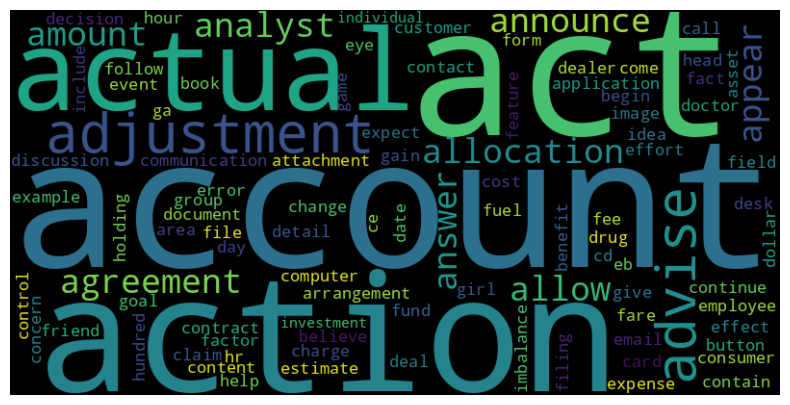

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100).generate(' '.join(tfidf_vectorizer.get_feature_names_out()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 100)          370400    
                                                                 
 spatial_dropout1d_4 (Spati  (None, 100, 100)          0         
 alDropout1D)                                                    
                                                                 
 lstm_4 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_10 (Dropout)        (None, 100)               0         
                                                                 
 dense_12 (Dense)            (None, 1)                 101       
                                                                 
Total params: 450901 (1.72 MB)
Trainable params: 450901 (1.72 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

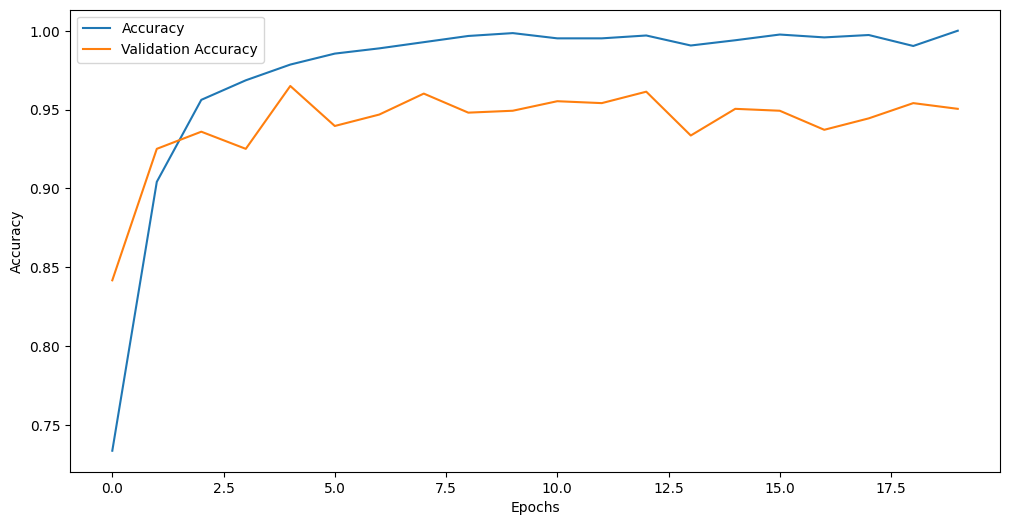

In [34]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Dropout

# Tokenize and pad the sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(emails_combined)
X_tokenized = tokenizer.texts_to_sequences(emails_combined)
maxlen = 100
X_padded = pad_sequences(X_tokenized, maxlen=maxlen)

# Split data again using the padded sequences
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Define hyperparameters
embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1

# Build LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.3, recurrent_dropout=0.3))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [44]:
# Save the model
model.save('spam_detection_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
pip install Flask


In [ ]:
from flask import Flask, request, jsonify
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import json

app = Flask(__name__)

# Load tokenizer - Check if 'tokenizer.json' exists before loading
try:
    with open('tokenizer.json') as f:
        data = json.load(f)
        tokenizer = Tokenizer.from_json(data)
except FileNotFoundError:
    # If 'tokenizer.json' doesn't exist, you'll need to recreate the tokenizer
    # This assumes you have the original 'emails_combined' data available
    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(emails_combined)  # Replace 'emails_combined' with your actual data

    # Save the tokenizer for future use
    tokenizer_json = tokenizer.to_json()
    with open('tokenizer.json', 'w', encoding='utf-8') as f:
        f.write(tokenizer_json)
# Define maxlen
maxlen = 100

@app.route('/')
def home():
    return "Spam Detection API is running."

@app.route('/predict', methods=['POST'])
def predict():
    # Get the data from the POST request
    data = request.get_json(force=True)

    # Ensure 'text' key is present in the request
    if 'text' not in data:
        return jsonify({'error': 'No text data provided.'}), 400

    # Process the input text
    text = data['text']
    text_seq = tokenizer.texts_to_sequences([text])
    text_pad = pad_sequences(text_seq, maxlen=maxlen)

    # Predict using the loaded model
    prediction = model.predict(text_pad)
    result = (prediction > 0.5).astype('int32')  # Convert to 0 or 1

    return jsonify({'prediction': int(result[0][0])})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
